# Script for classifier model visualisation

In [17]:
import os, sys, pickle
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from math import ceil
from random import randint
import matplotlib.pyplot as plt
from shared.autoencoderHelpers import read_n_images, generate_img_from_folder, get_input_shape, get_num_examples, plot_history, get_images, bgr2rgb, plot_reconstruction
from shared.classifierHelpers import generate_img_label_from_folder
DATA_DIR = '../data'

In [2]:
def loadModel(configName, method='untrained'):
    path = '../models/classifiers/'+configName+'/'+method+'/'
    modelPath = path + 'model'
    historyPath = path +'history.pickle'
    
    model = tf.keras.models.load_model(modelPath)
    with open(historyPath, 'rb') as f:
        history = pickle.load(f)
        
    return (model,history)

In [1]:
def showLoss(history, method):
    loss = history['loss']
    val_loss = history['val_loss']
    plt.plot(loss, label='Training')
    plt.plot(val_loss, label='Validation') 
    plt.title(method)
    plt.ylabel('Loss (Categorical CE)')
    plt.xlabel('Epoc')
    plt.legend()
    plt.show()
    
def showAccuracy(history, method):
    acc = history['acc']
    val_acc = history['val_acc']
    plt.plot(acc, label='Training')
    plt.plot(val_acc, label='Validation') 
    plt.title(method)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoc')
    plt.legend()
    plt.show()
    
def evaluateModel(model):
    # load data and run evalutation
    BATCH_SIZE_TEST = 32
    NUM_SAMPLES_TEST = get_num_examples(DATA_DIR, 'test')
    STEPS_TEST = ceil(NUM_SAMPLES_TEST/BATCH_SIZE_TEST)
    results =model.evaluate_generator(generate_img_label_from_folder(DATA_DIR, 'test', BATCH_SIZE_TEST),steps=STEPS_TEST)
    print('test loss: ', results[0])
    print('test accuracy: ',results[1])
    return True

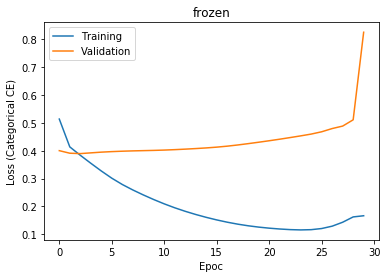

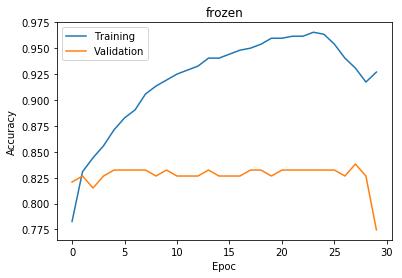

test loss:  1.1473173101743062
test accuracy:  0.7283237


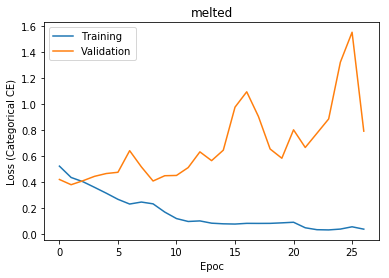

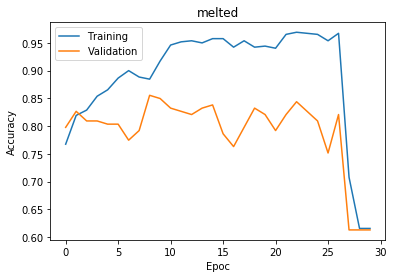

test loss:  nan
test accuracy:  0.67052025


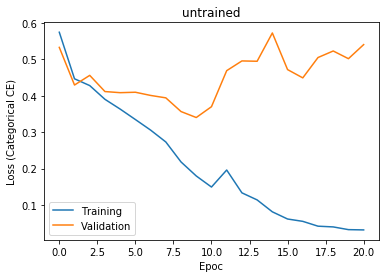

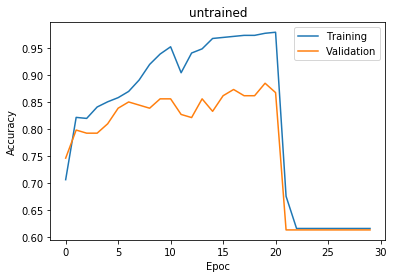

test loss:  nan
test accuracy:  0.67052025


True

In [22]:
(model, history) = loadModel('config1','frozen')
showLoss(history,'frozen')
showAccuracy(history,'frozen')
evaluateModel(model)
(model, history) = loadModel('config1','melted')
showLoss(history,'melted')
showAccuracy(history,'melted')
evaluateModel(model)
(model, history) = loadModel('config1','untrained')
showLoss(history,'untrained')
showAccuracy(history,'untrained')
evaluateModel(model)

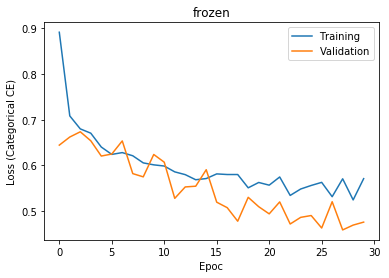

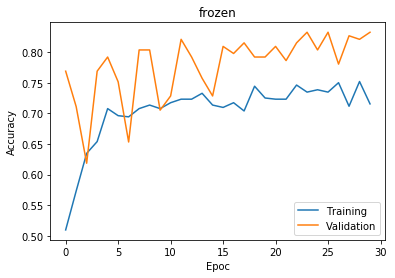

test loss:  0.44279126822948456
test accuracy:  0.867052


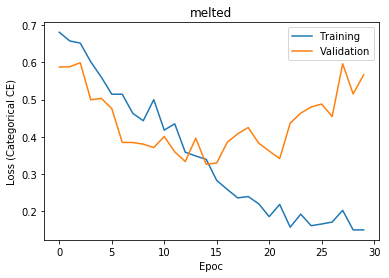

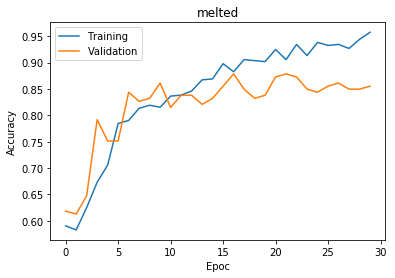

test loss:  0.7762950311104456
test accuracy:  0.8612717


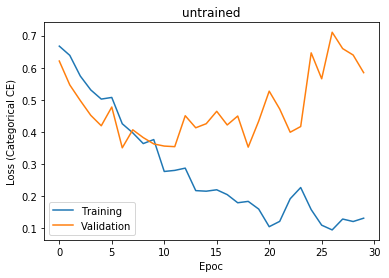

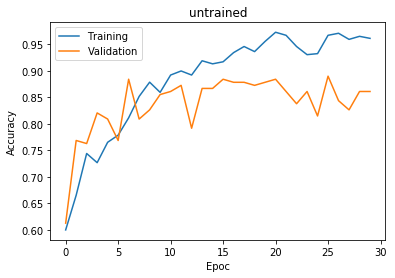

test loss:  0.7952864815791448
test accuracy:  0.8150289


True

In [23]:
(model, history) = loadModel('config2','frozen')
showLoss(history,'frozen')
showAccuracy(history,'frozen')
evaluateModel(model)
(model, history) = loadModel('config2','melted')
showLoss(history,'melted')
showAccuracy(history,'melted')
evaluateModel(model)
(model, history) = loadModel('config2','untrained')
showLoss(history,'untrained')
showAccuracy(history,'untrained')
evaluateModel(model)

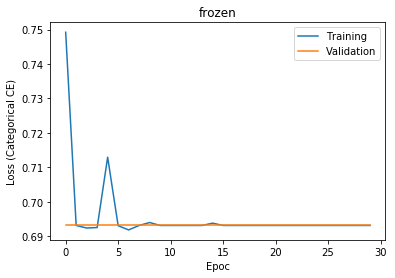

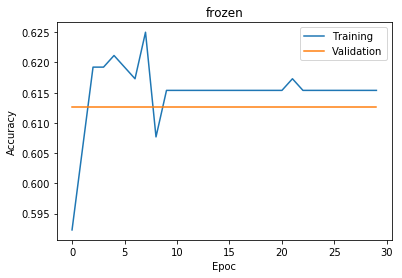

test loss:  0.693147192398707
test accuracy:  0.67052025


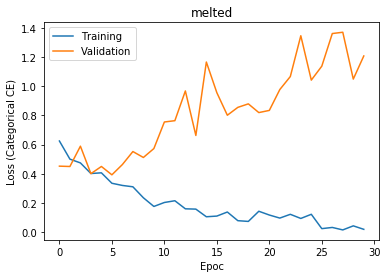

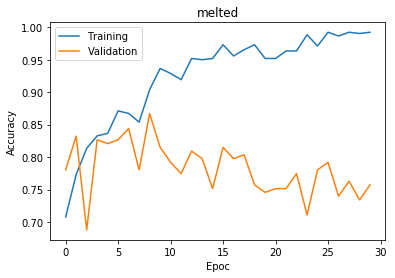

test loss:  1.757998675107956
test accuracy:  0.75722545


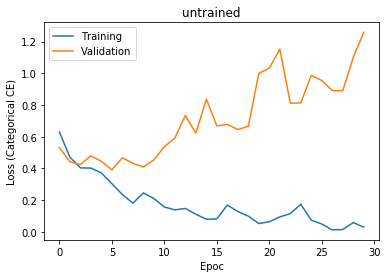

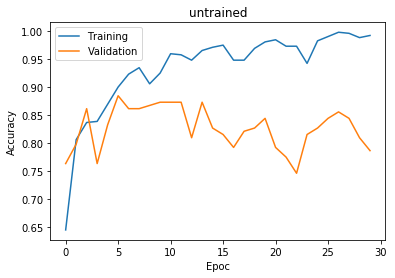

test loss:  1.1616889387369156
test accuracy:  0.87283236


True

In [24]:
(model, history) = loadModel('config3','frozen')
showLoss(history,'frozen')
showAccuracy(history,'frozen')
evaluateModel(model)
(model, history) = loadModel('config3','melted')
showLoss(history,'melted')
showAccuracy(history,'melted')
evaluateModel(model)
(model, history) = loadModel('config3','untrained')
showLoss(history,'untrained')
showAccuracy(history,'untrained')
evaluateModel(model)